### MS 263 In-class problems: Feb. 27 2018

#### 1. Uncertainty in surface ocean CO$_2$ calculations

The equation for computing CO$_2$ concentrations from measurements of dissolved inorganic carbon (DIC) and pH is given by

$$ [CO_2]=  \frac{[DIC]}{\left(1+ \frac{K_1'}{H^+}+\frac{K_1'K_2'}{[H^+]^2}\right)} $$

where the dissociation constants that govern the dissociation of CO$_2$ into carbonate and bicarbonate are known from laboratory measurements and are given on a logarithmic scale as $pK'_1 = -\log{K'_1} = $ 5.847 and $pK'_1 = -\log{K'_2} = $ 8.966.

The fugacity (partial pressure, not accounting for non-ideal gas effects) of CO$_2$ can be calculated using

$$ fCO_2 = \frac{[CO_2]}{K_H}$$

where $K_{H,CO_2}$ =  3.24x10$^{-2}$ mol/(kg atm) is Henry's Law constant.

Measurements of DIC have an analytical uncertainty of +/-2 $\mu$mol/kg. Measurements of pH have an analytical uncertainty of +/- 0.0020.

Typical surface values are [DIC] $\approx$ 2000 $\mu$mol/kg and pH $\approx$ 8.1. What is the uncertainty in $fCO_2$ calculated from these values?

In [7]:
%matplotlib notebook
from uncertainties import ufloat
DIC = ufloat(2000, 2)
pH = ufloat(8.1, 0.0020)
H=10**-pH
K1 = (10**-5.847)
K2 = (10**-8.966)
KH = .0324

CO2 = DIC/(1+(K1/H)+((K1*K2)/(H**2)))
fCO2 = CO2/KH

print ('fCO2 is',fCO2,'μ mol/kg')



fCO2 is 301.9+/-1.6 μ mol/kg


#### 2. Harmonic analysis

Fit an annual cycle to a two-year time series of monthly SST data (source: Emery and Thomson).

* Write out the problem as a system of equations, and in matrix form.
* Create a design matrix A - start with a matrix of NaNs, then fill in the columns.
* Use `np.linalg.lstsq` to solve for the coefficients.
* Plot the modeled fit on top of the data.

(array([ 10.9375    ,  -1.98067816,  -1.78797519]), array([ 18.37695506]), 3, array([ 4.89897949,  3.46410162,  3.46410162]))


<IPython.core.display.Javascript object>


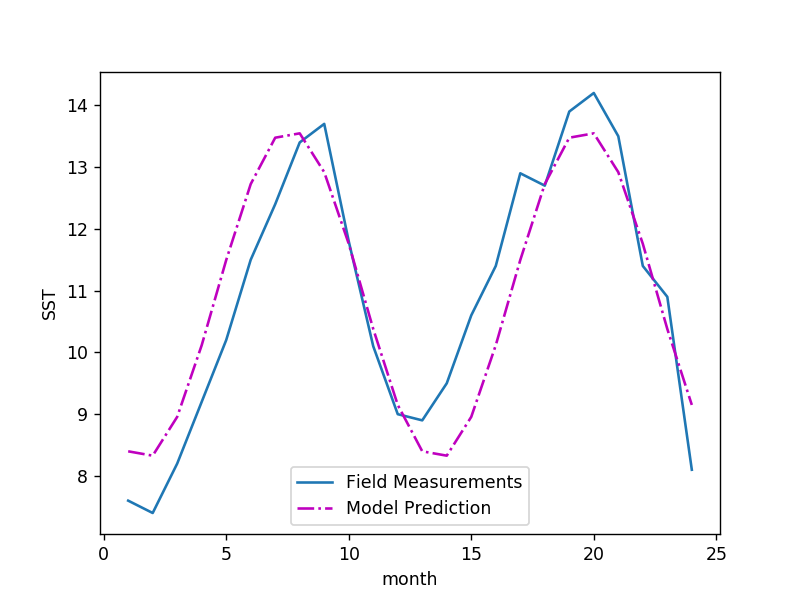

In [4]:
import numpy as np
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt 

t = np.arange(1,25)
SST = np.array([7.6, 7.4, 8.2, 9.2, 10.2, 11.5, 12.4, 13.4, 13.7, 11.8, 10.1, 9.0,
                8.9, 9.5, 10.6, 11.4, 12.9, 12.7, 13.9, 14.2, 13.5, 11.4, 10.9, 8.1])

# the system of equations will follow"
# SST = 1(C1)+(C2)*(sin((2*np.pi*tn)/12))+(C3)*(cos((2*np.pi*tn)/12))

matrixa = np.empty([24,3])*np.nan
matrixa[:,0]=1
matrixa[:,1] = np.sin((2*np.pi*t)/12)
matrixa[:,2]= np.cos((2*np.pi*t)/12)

carray = np.linalg.lstsq(matrixa,SST)
print(carray)
C1 = carray[0][0]
C2 = carray[0][1]
C3 = carray[0][2]

SST_predict = 1*(C1)+(C2)*(np.sin((2*np.pi*t)/12))+(C3)*(np.cos((2*np.pi*t)/12))

plt.figure()
plt.plot(t,SST, label = 'Field Measurements')
plt.xlabel('Month')
plt.ylabel('SST')
plt.plot(t, SST_predict,'-.m', label = 'Model Prediction')
plt.legend()

#### 3. Computing vertical gradients

Using data from one station on the West Coast Ocean Acidification cruise, estimate the vertical gradient of nitrate $\Delta N$/$\Delta z$ at locations throughout the water column. Pressure can be used as the vertical coordinate, $z$.

Use Python to make this calculation two different ways:

1. Using a for loop.
2. Not using a for loop.

Make sure that both calculations work for different profiles that have a different number of samples.

changing slopes with a loop [ 0.01111111  0.00343554  0.01185682  0.01553398  0.01528472  0.02291457
  0.07616279  0.24464945  0.15346154  0.21156069  0.2203125   0.16160714
  0.21382979  0.50721649  0.26698113  0.0675     -0.          0.00147059
 -0.        ]
  
changing slopes without a loop [ 0.01111111  0.00343554  0.01185682  0.01553398  0.01528472  0.02291457
  0.07616279  0.24464945  0.15346154  0.21156069  0.2203125   0.16160714
  0.21382979  0.50721649  0.26698113  0.0675     -0.          0.00147059
 -0.        ]


<IPython.core.display.Javascript object>


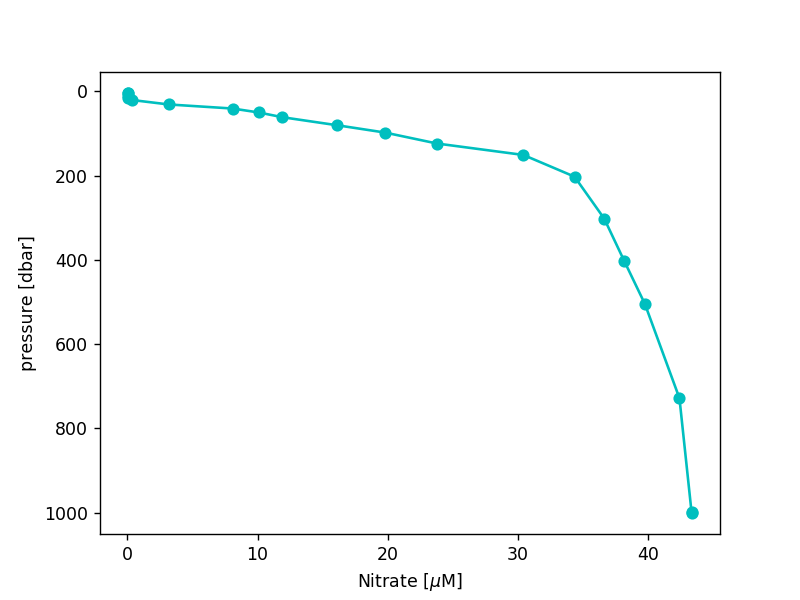

Text(0,0.5,'pressure [dbar]')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# you may need to change this, depending on where your data file is
filename = 'WCOA2013_hy1.csv' 
df = pd.read_csv(filename,header=31,na_values=-999,
                 parse_dates=[[8,9]])

# Create a new data frame, using only cast number 12
idx = (df['STNNBR'] == 12)
cast = df.loc[idx]

press = np.array(cast['CTDPRS'])
nit = np.array(cast['NITRAT'])

## with a for loop
slopex = []

for i in np.array(range(0,len(nit)-1)):
    slope = (nit[i+1]-nit[i])/(press[i+1]-press[i])
    slopex = np.append(slopex, slope)
print ('changing slopes with a loop', slopex)


'\n'
print('  ')
'\n'

## without a loop
n = np.array(range(0,len(nit)-1))
slope2 = (nit[n+1]-nit[n])/(press[n+1]-press[n])
print('changing slopes without a loop', slope2)

plt.figure()
plt.plot(cast['NITRAT'],cast['CTDPRS'],'-oc')
plt.gca().invert_yaxis()
plt.xlabel('Nitrate [$\mu$M]')
plt.ylabel('pressure [dbar]')


#### 4. Plot loop

Create a for loop that loops through the following variables, and plots all available data from the WCOA cruise as a function of pressure (use pressure as the vertical coordinate).

<IPython.core.display.Javascript object>


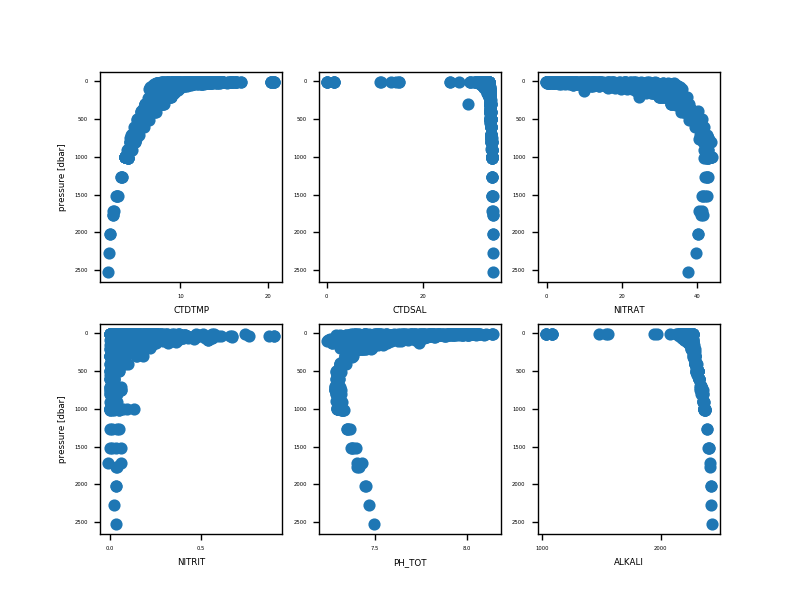

In [6]:
variables_to_plot = ['CTDTMP','CTDSAL','NITRAT','NITRIT','PH_TOT','ALKALI']
count = 0
plt.figure()
for var in variables_to_plot:
    count = count+1
    plt.subplot(2,3,count)
    plt.plot(df[var],df['CTDPRS'],'o',)
    plt.gca().invert_yaxis()
    plt.xlabel(var)
    if count == 1 or count ==4 :
        plt.ylabel('pressure [dbar]',fontsize=5)
    plt.xticks(fontsize=3)
    plt.yticks(fontsize=3)
   
    